<a href="https://colab.research.google.com/github/olsem1/WP-3/blob/master/cbr_ml_decision_trees_and_ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision stump & decision trees 

### Outline <a name = 'outline'></a>
* [Data generation](#data)
* [Decision stump & decision trees](#tree)
* [Random forest](#rf)
* [Gradient Boosting](#gbdt)
* [Learning curves](#curves)
* [(off topic) Distance-based models](#knn)

In [1]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.pyplot.style.use('ggplot')

import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus 

from IPython.display import Image
from sklearn import datasets, ensemble, metrics, model_selection, neighbors, tree

In [2]:
%matplotlib inline

## Data generation <a name = 'data'></a>

In [3]:
def plot_2d_dataset(data_tuple, size = (5,5), 
                    colors:list = ['red', 'black']):
    """Function to generate 2d plot for plain datasets"""
    
    #set size
    plt.figure(figsize = size)
    
    #build figure
    plt.scatter(list(map(lambda x: x[0], data_tuple[0])), 
                list(map(lambda x: x[1], data_tuple[0])), 
                c = data_tuple[1], 
                cmap = matplotlib.colors.ListedColormap(colors))
    
    #show figure
    plt.show()

In [4]:
#data generation
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant = 0, 
                                                      n_clusters_per_class = 1, 
                                                      random_state = 0)

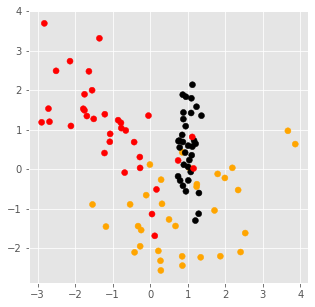

In [5]:
plot_2d_dataset(classification_problem, colors = ['red', 'black', 'orange'])

In [6]:
#data train/test split
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1],
    test_size = 0.3,
    random_state = 0)

[back to outline](#outline)

## Decision tree classifier <a name = 'tree'></a>

In [7]:
#model 
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 1)


In [8]:
#model training
clf.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [9]:
#make predictions
predictions = clf.predict(test_data)

In [10]:
#calculate quality
metrics.accuracy_score(test_labels, predictions)

0.6666666666666666

In [11]:
test_labels

array([2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0,
       1, 0, 2, 2, 1, 0, 2, 0])

In [12]:
predictions

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0])

### Decision surface analisys

In [13]:
#helper functions for separating surface visualization

colors = matplotlib.colors.ListedColormap(['red', 'black', 'orange'])
light_colors = matplotlib.colors.ListedColormap(['lightcoral', 'silver','bisque'])

def get_meshgrid(data, step = .05, border = .5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors, size = (16, 6)):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = size)
    
    #get mesh grid
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(
        estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    #print(mesh_predictions)
    
    #plot decision surface on the train data 
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    
    
    plt.scatter(train_data[:, 0], 
                   train_data[:, 1], 
                   c = train_labels, 
                   s = 100, 
                   cmap = colors)
    
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(
        train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
 
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    
    plt.scatter(test_data[:, 0], 
                test_data[:, 1], 
                c = test_labels, 
                s = 100, 
                cmap = colors)
    
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(
        test_labels, estimator.predict(test_data))))

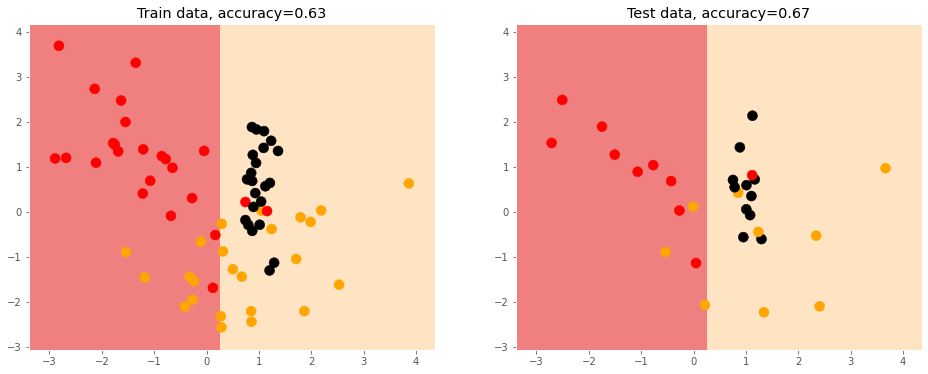

In [14]:
plot_decision_surface(clf, train_data, train_labels, test_data, test_labels)

### Decision surface depending on tree depth

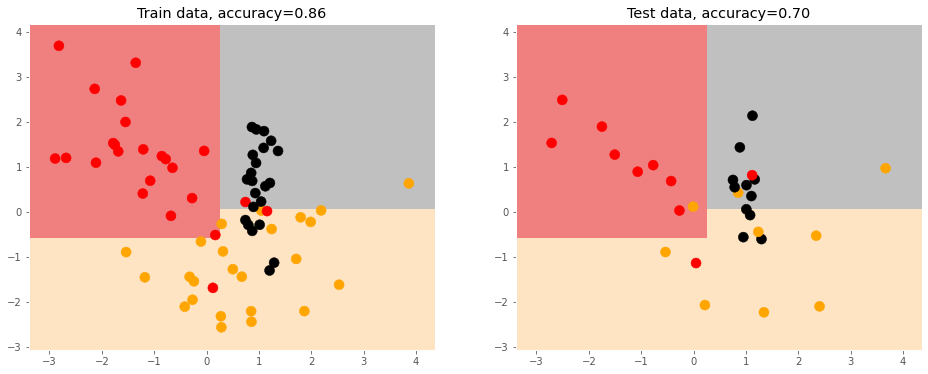

In [ ]:
estimator = tree.DecisionTreeClassifier(random_state = 0, max_depth = 2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

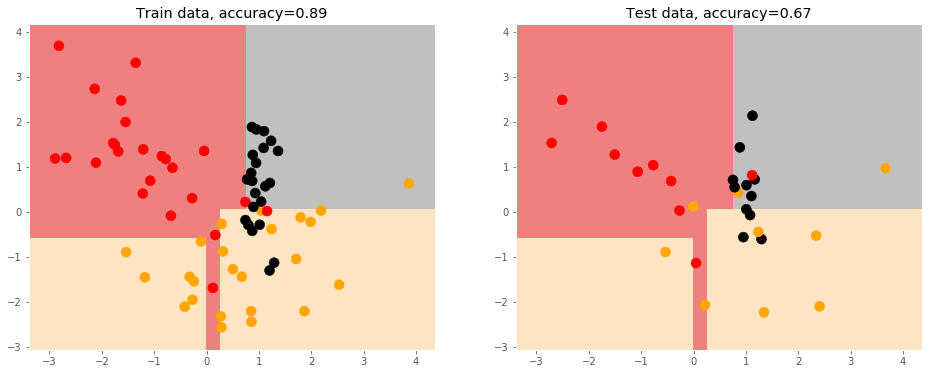

In [ ]:
estimator = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

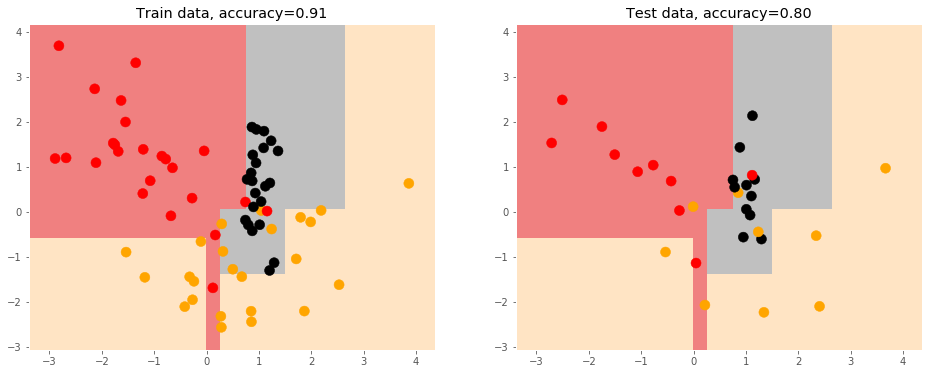

In [ ]:
estimator = tree.DecisionTreeClassifier(random_state = 0, max_depth = 4)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

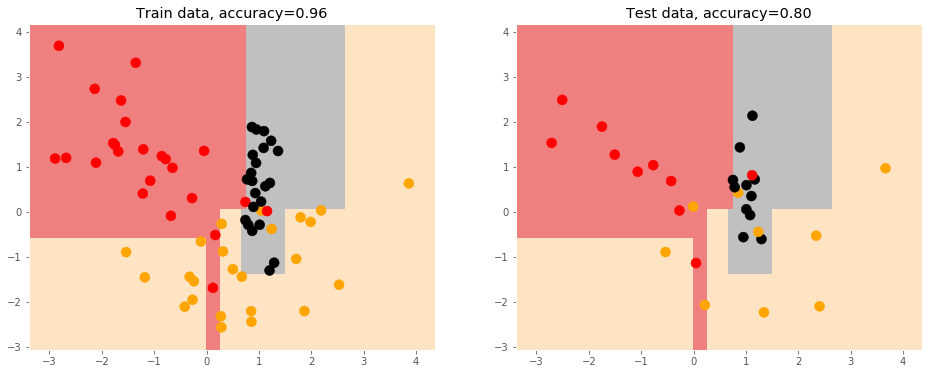

In [ ]:
estimator = tree.DecisionTreeClassifier(random_state = 0, max_depth = 5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

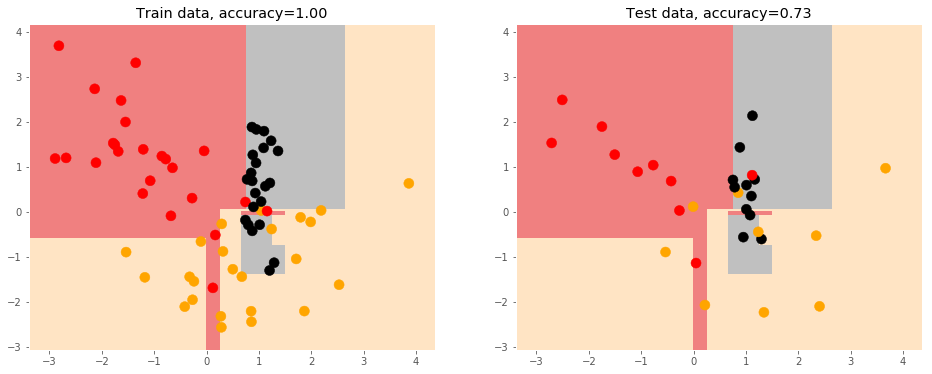

In [ ]:
estimator = tree.DecisionTreeClassifier(random_state = 0)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

### Decision tree visualization

In [ ]:
estimator = tree.DecisionTreeClassifier(random_state = 0, )
estimator.fit(train_data, train_labels)

dot_data = tree.export_graphviz(estimator, out_file="graphviz/small_tree.out", 
                         feature_names=['x', 'y'],  
                         class_names=['red', 'black', 'orange'],  
                         filled=True, rounded=True,  
                         special_characters=True)

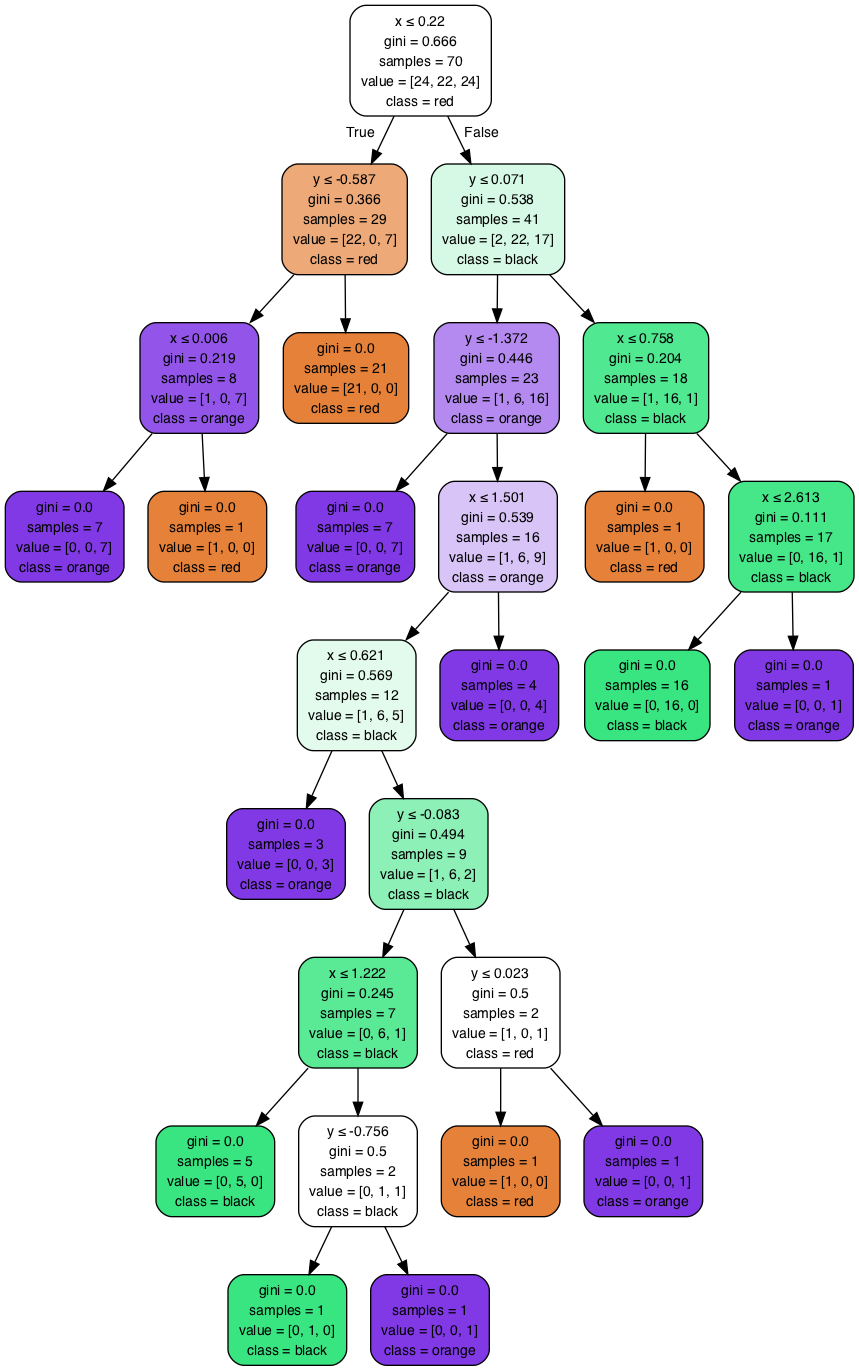

In [ ]:
graph = pydotplus.graphviz.graph_from_dot_file("graphviz/small_tree.out")  
Image(graph.create_png())

[back to outline](#outline)

## Random forest <a name = 'rf'></a>

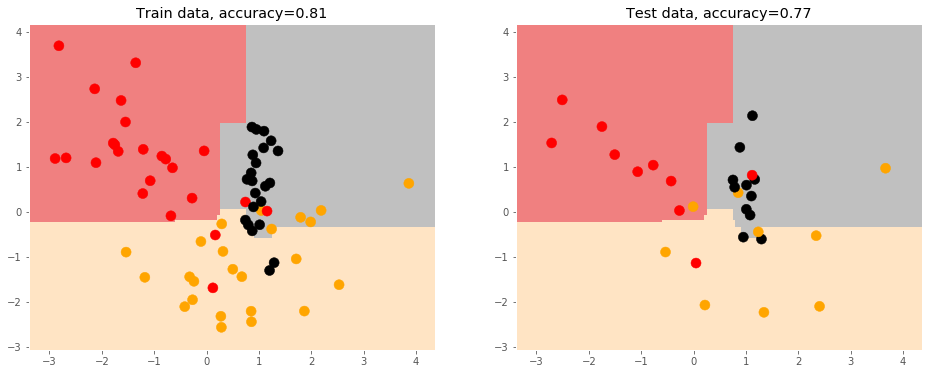

In [ ]:
estimator = ensemble.RandomForestClassifier(n_estimators = 10, max_depth = 2, random_state = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

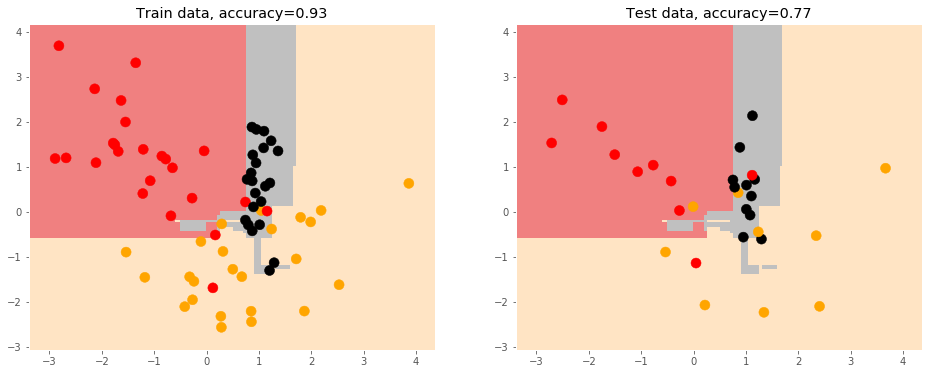

In [ ]:
estimator = ensemble.RandomForestClassifier(n_estimators = 10, max_depth = 4, random_state = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

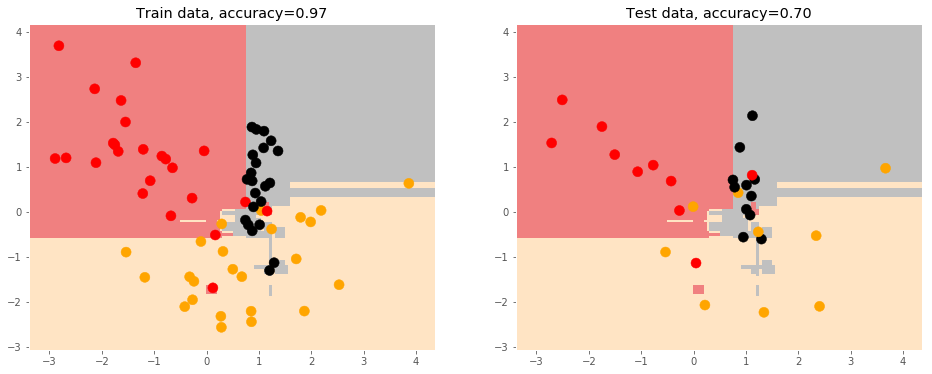

In [ ]:
estimator = ensemble.RandomForestClassifier(n_estimators = 10, max_depth = 6, random_state = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

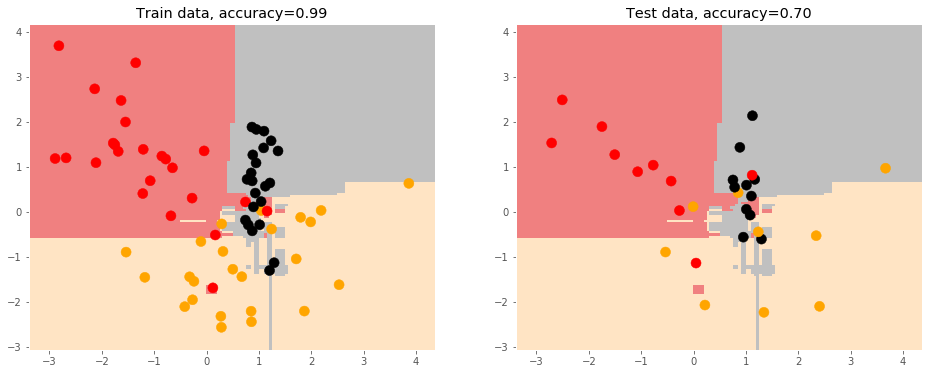

In [ ]:
estimator = ensemble.RandomForestClassifier(n_estimators = 10, random_state = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

[back to outline](#outline)

## Gradien Boosting <a name = 'gbdt'></a>

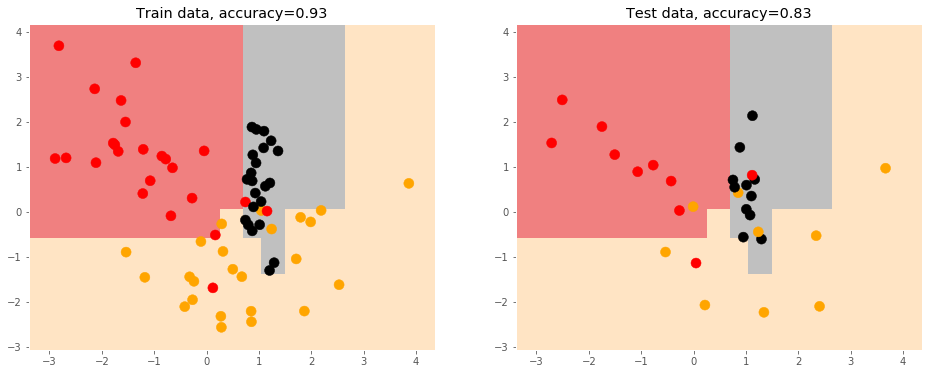

In [ ]:
estimator = ensemble.GradientBoostingClassifier(n_estimators = 10, max_depth = 2, random_state = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

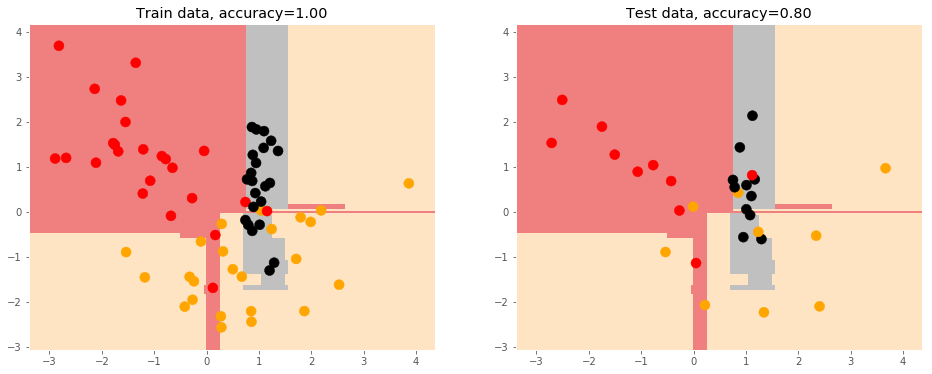

In [ ]:
estimator = ensemble.GradientBoostingClassifier(n_estimators = 10, max_depth = 5, random_state = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

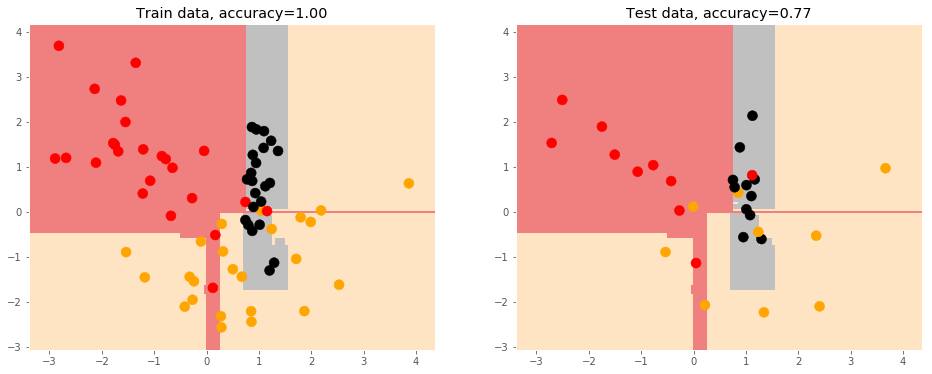

In [ ]:
estimator = ensemble.GradientBoostingClassifier(n_estimators = 10, max_depth = 10, random_state = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## Learning curves  <a name = 'curves'></a>

In [ ]:
clf_1k_data, clf_1k_labels = datasets.make_classification(n_samples = 1000, n_features = 2, 
                                                      n_informative = 2, n_classes = 3, 
                                                      n_redundant = 0, n_clusters_per_class = 1,
                                                      random_state = 0)

In [ ]:
def plot_learning_curves(estimator, data, labels):
    train_sizes, train_scores, test_scores = model_selection.learning_curve(
        estimator, data, labels, train_sizes=np.arange(0.01,1., 0.05), cv=3, scoring='accuracy')

    plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
    plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
    plt.ylim((0.0, 1.05))
    plt.legend(loc='lower right')
    plt.show()

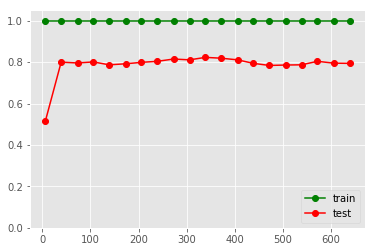

In [ ]:
estimator = tree.DecisionTreeClassifier()

plot_learning_curves(estimator, clf_1k_data, clf_1k_labels)

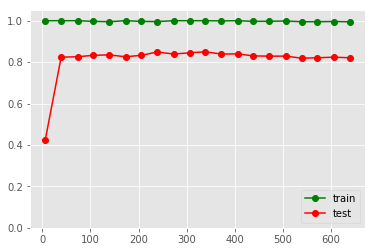

In [ ]:
estimator = ensemble.RandomForestClassifier(n_estimators = 20, random_state = 1)

plot_learning_curves(estimator, clf_1k_data, clf_1k_labels)

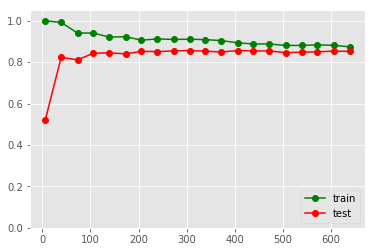

In [ ]:
estimator = ensemble.GradientBoostingClassifier(n_estimators = 20, max_depth = 2, random_state = 1)

plot_learning_curves(estimator, clf_1k_data, clf_1k_labels)

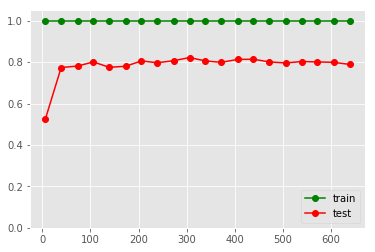

In [ ]:
estimator = ensemble.GradientBoostingClassifier(n_estimators = 20, max_depth = 10, random_state = 1)

plot_learning_curves(estimator, clf_1k_data, clf_1k_labels)

[back to outline](#outline)

## (off topic) Distance-based models <a name = 'knn'></a>

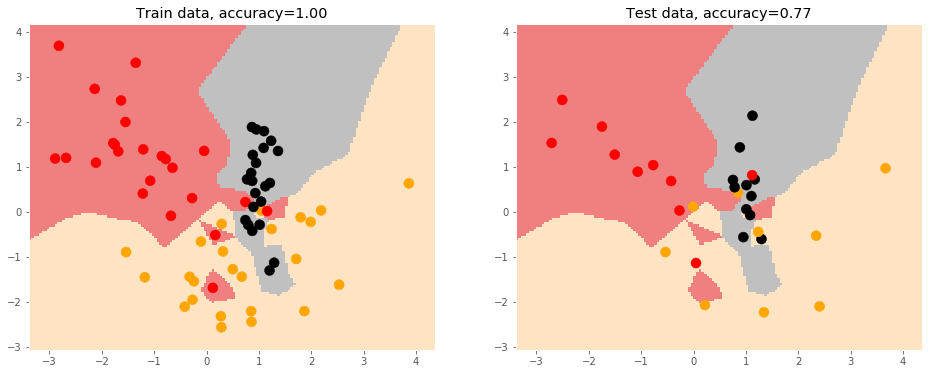

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

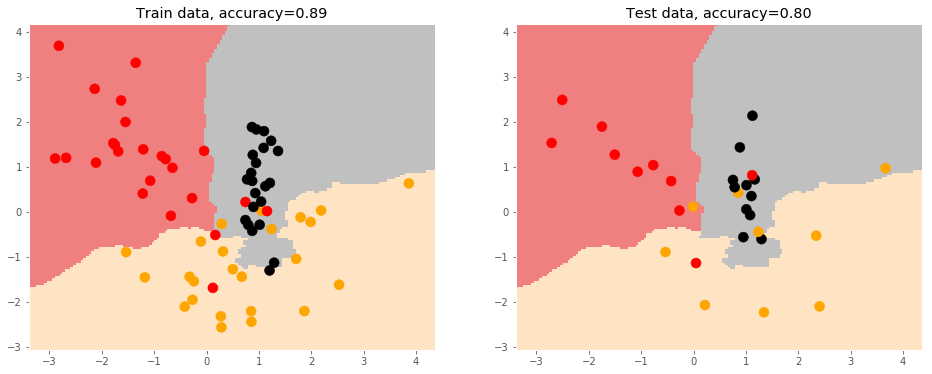

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

[back to outline](#outline)